# How fast should you drive at night?
The first question we're talking about in class involves the fastest speed it might be safe to drive at at night.  

Situation: you're driving at a speed $v0$ and you see something ahead of you that makes you panic stop.  The relevant coefficient of friction is $\mu_s=[0.4,0.7]$ and the object is $d=106m$ (350ft) ahead of you.

Human reaction time (visual) is about $t_v=0.25$ seconds.  While reacting, the car travels 

$x1=v0~t_v$.

Then, while braking, the car travels $x2$, where we've shown algebraically that $2~a~x2={v_2}^2-{v_1}^2$.  In this specific example we have, 

$2~\mu_s~g~x2=v0^2$.

So now, remember that the total travel distance is $x1+x2=106$ meters.  This gives the equation:

$v0~t_v+\frac{v0^2}{2~\mu_s~g}=106$ meters

So, what velocity makes this equation true?  In the context of the problem, what is the fastest velocity that will still allow us to stop in time?  

Mathematically, this is a root-finding problem.  One approach is to make a plot - when does the function on the left equal 106meters on the right?

In [13]:
# define parameters
g=9.8
mu_1=0.4
mu_2=0.7
tv=0.25
# make two lists - one of velocities, v0 and 
# another list of the left hand side of the equation
list_of_v0=[]
list_of_eq_lhs_1=[]
list_of_eq_lhs_2=[]
# iterate over possible v0's
for i in range(50):
    # generate v0 from 0 to 49
    v0 = 0+i 
    # for each v0, compute the other side of the equation
    lhs_mu_1 = v0*tv+v0*v0/(2*mu_1*g)
    lhs_mu_2 = v0*tv+v0*v0/(2*mu_2*g)
    # store the data in lists to plot
    list_of_v0.append(v0)
    list_of_eq_lhs_1.append(lhs_mu_1)
    list_of_eq_lhs_2.append(lhs_mu_2)

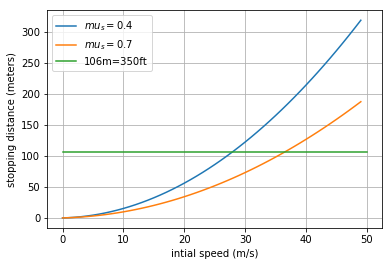

In [14]:
import matplotlib.pyplot as plt
# plot the two lhs data, note that this is stoppnig distance
plt.plot(list_of_v0,list_of_eq_lhs_1,label="$mu_s=0.4$")
plt.plot(list_of_v0,list_of_eq_lhs_2,label="$mu_s=0.7$")
# plot the problem's stopping distance
plt.plot([0,50],[106,106],label="106m=350ft")
plt.ylabel("stopping distance (meters)")
plt.xlabel("intial speed (m/s)")
plt.grid()
plt.legend()
plt.show()

With the graph, you can visually estimate where the lines intersect and solve the problem approximately.  If you need more precision than looking at graph provides, you can use a "root-finding" library.  This is the approach that most TI calculators take when you use them to solve an equation.

In [25]:
# root-finding takes an additional library
# using the function "fsolve" frim scipy.optimize
from scipy.optimize import fsolve

Now, the root-finding function takes an equation (as a function) as input.  It finds the input variable (v0) that makes the function zero.  This means we need to re-write the equation we're trying to solve as

$v0~t_v+\frac{v0^2}{2~\mu_s~g} - 106~meters = 0$


In [26]:
# then, we need to specify the equation we want to solve
# rewite so that it equals zero, eg
#   v0*tv+v0*v0/(2*mu_1*g) - distance =0
def func(v0,tv,mu,g,distance):
    return v0*tv + v0*v0/(2*mu*g) - distance

In [33]:
# then, specif parameters for the function,
tv,mu,g,distance = 0.25,0.4,9.8,106.

# and specify an initial guess for v0
guess_v0 = [30,]    

# and then run the solver
first_v=fsolve(func,guess_v0,args=(tv,mu,g,distance)) 
print(first_v)

[ 27.86441714]


So one intersection is 27.8 m/s.  Run the solver again for the other $\mu$

In [35]:
# then, specif parameters for the function,
tv,mu,g,distance = 0.25,0.7,9.8,106.

# and specify an initial guess for v0
guess_v0 = [30,]    

# and then run the solver
second_v=fsolve(func,guess_v0,args=(tv,mu,g,distance)) 
print(second_v)

[ 36.45909102]


Now, put these roots in a plot.

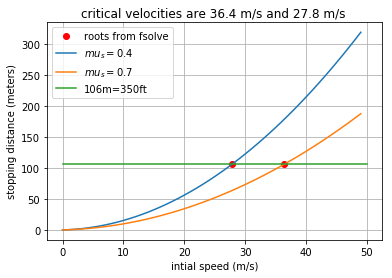

In [46]:
# plot the two roots
plt.plot([first_v[0],second_v[0]],[106,106],"ro",
         label="roots from fsolve")
plt.title("critical velocities are 36.4 m/s and 27.8 m/s ")
# everything following is from above
# plot the two lhs data, note that this is stoppnig distance
plt.plot(list_of_v0,list_of_eq_lhs_1,label="$mu_s=0.4$")
plt.plot(list_of_v0,list_of_eq_lhs_2,label="$mu_s=0.7$")
# plot the problem's stopping distance
plt.plot([0,50],[106,106],label="106m=350ft")
plt.ylabel("stopping distance (meters)")
plt.xlabel("intial speed (m/s)")
plt.grid()
plt.legend()
plt.show()

# Coasting down hwy 43

Also discussed in class is coasting down highway 43 from the I-90 interchange south of Winona.  Recall that the speed you achieve is limited by air resistance (drag).  The specific force balance could be modeled as:

$m~g~\sin[1.7 degrees] = \frac{1}{2}~C_D~A~\rho_{air}~v^2$

Below, I solve this equation for $v$ and estimate a value based on numbers for a modern VW Golf. 

In [55]:
import math
m=1360 # kg
g=9.8 # N/kg
A=2.3 # m^2, 71" x 51"
Cd=0.32
rho_air=1.2 # kg/m^3
sin_theta=150/5100 # from the geography of Winona

v_terminal = math.sqrt(m*g*sin_theta/(0.5*Cd*A*rho_air))

print(v_terminal,"m/s")
print(v_terminal*(6.2/10000)*(3600/1),"mph")

29.793978576556203 m/s
66.50016018287344 mph
